#### <a id='top'></a>

# Homework 2: Data Visualization and Probability Analysis 
***

**Name**: Aanvi Guliani

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 14**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a id='p1'></a>

## (15 points) Problem 1: Theory (Median Distance)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?

**Proof**  
Break our absolute value into a piecewise function:  
$$|X_i-c| = \left\{
\begin{array}{ll}
      x_i-c & x_i-c \geq0 \\
      -(x_i-c) & x_i-c < 0 \\
\end{array} 
\right.$$
  
Differentiating gives us:  
$$\dfrac{d}{dc}|X_i-c| = \left\{
\begin{array}{ll}
      -1 & x_i-c \geq0 \\
      1 & x_i-c < 0 \\
\end{array} 
\right.$$  
 
$$f'(c) = \dfrac{d}{dc}\sum_{i=1}^n |X_i-c| = \dfrac{d}{dc}|X_i-c| = \left\{
\begin{array}{ll}
      \sum_{i=1}^n-1 & x_i-c \geq0 \\
      \sum_{i=1}^n1 & x_i-c < 0 \\
\end{array} 
\right.$$ 


Since c is a minimizer, $f'(c)=0$. For this to be true, there must be an equal number of instances where $x_i-c \geq 0$ and $x_i-c < 0$. This means that there must be an equal amount of numbers where $x_i \geq c$ and $x_i < c$. This is the "middle point" of the data, or the median.  

Thus, The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


**Solution**  
For a data set with n observations, it takes **n+1** operations to calculate the mean of the data set. To figure this out, I created a modified version of the python function (added below) to calculate the sample mean. Along with calculating the mean, wherever a floating point operation occurred, I incremented a variable ops by 1. Using multiple test cases, I arrived at the conclusion that there were **n+1** calculations for for a list of length n.

In [2]:
# modified version of mean function to calculate number of ops. 
# since we are only interested in ops, we don't have to calculate the mean, but it's an extra check to make sure
# calculations and therefore number of ops are correct

def calcMean(myList):
    length = len(myList)
    mean = 0
    #variable to keep track of number of operations
    ops = 0
    for i in range(0,length):
        #accumulate sum of list values
        mean += myList[i]
        #since an op occurs (addition), increment ops var
        ops += 1
    #now that we have sum of values, divide it by length of the list
    mean = mean / length
    #print(mean)
    #since this is an op (division), increment ops var
    ops += 1
    #instead of returning the mean, return the number of ops
    return ops
    
#test cases
A = [1,1,1,1,1,1]
B = [2,1,2,1,2,2,2]
C = [0,1,12,3,4,5,6,7]
D = [1]

print("n = ",len(A), "; ops = ", calcMean(A))
print("n = ",len(B), "; ops = ", calcMean(B))
print("n = ",len(C), "; ops = ", calcMean(C))
print("n = ",len(D), "; ops = ", calcMean(D))

n =  6 ; ops =  7
n =  7 ; ops =  8
n =  8 ; ops =  9
n =  1 ; ops =  2


**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Solution**  
For every added observation, the mean function is called again with one added observation. We know that for a dataset with n observations, there are (n+1) operations occurring. Applying these same principles:  
$$
ops = (1+1) + (2+1) + (3+1) + ... (n+1)  \\
    = \sum_{i=1}^{n} (i+1)
$$

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after problem 3, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [3]:
def my_sample_mean(arr):
    # define variables length and mean for code readability
    length = len(arr)
    mean = 0
    
    # for loop to sum up all values in the array
    for i in range(0,length):
        mean += arr[i]
        
    #divide the sum of all values in array by length of array + return
    mean = mean / length
    return mean

def my_sample_var(arr):
    # get the mean of data set by calling my_sample_mean fcn - define length of array / summation for code readability
    mean = my_sample_mean(arr)
    length = len(arr)
    summation = 0
    
    # get ∑𝑘=1𝑛(𝑥𝑘−𝑥¯𝑛)2 by looping through the array - store in summation var
    for i in range(0,length):
        summation += ((arr[i] - mean)**2)
        
    # calculate summation / (n-1) and return
    return (summation/(length-1))

**Part D**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]`

In [4]:
#define 
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]
print("Sample mean: ", my_sample_mean(bus))
print("Sample variance:", my_sample_var(bus))

Sample mean:  56.416666666666664
Sample variance: 7274.628787878787


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [5]:
# Given API:
def update_mean(prev_mean, xn, n):
    # calculate now mean and return
    now_mean = prev_mean + ((xn-prev_mean)/n)
    return now_mean

# define buffbus_bad_means as an numpy array w/ length of bus with all zeroes / define new mean as 0 for first call
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]
buffbus_bad_means = np.zeros(len(bus))
newMean = 0

# loop through bus array, call update_mean with new_mean var, xn (bus[i]) and n to reassign val of new mean
# store that value in buffbus_bad_means array at index i
for i in range (0,len(bus)):
    newMean = update_mean(newMean,bus[i],i+1)
    buffbus_bad_means[i] = newMean

**Array Values Stored**  
buffbus_bad_means = [312.0, 158.0, 108.66666666666666, 108.66666666666666, 81.5, 69.6, 64.5, 66.85714285714286, 60.875, 55.0, 55.5, 57.72727272727273, 56.416666666666664]  

Looking at the array, the last value in buffbus_bad_means should have the sample mean of the entire '**bus**' array

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [6]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in **part E**?  Is this truly better than the uninformed approach from **part B**?

**Answer**  
Looking at the code, we see that for each call to update_mean, there are three floating point observations. The first operation is subtracting $x_n$ from $\bar{x}_{n-1}$, the second operation is dividing $x_n - \bar{x}_{n-1}$ by $n$, and the third operation is adding this to $\bar{x}_{n-1}$.  
  
Now it's just a matter of finding out how many calls to update_mean we have in a dataset of n observations. Since for each element in the dataset we make a new call to update_mean, for a dataset of length $n$, we have $n$ calls to update_mean.  
  
Putting these two together, we find that for a dataset of length $n$, there are $3n$ floating point operations to calculate the sample mean of the dataset.  
  
For small datasets, specifically datasets of length 1 or 2, the approach in part E would take more operations than the approach from part B. With a dataset of length 3, they would require the same number of operations. However, using the approach datasets of length greater than 3 would be the better option. In general, if we are working with data, it means that we probably expect to see more than 3 data points, so I would recommend using the approach from part E regardless of the size of the data set.

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [7]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [8]:
# probability of survival based on overall population
# formula: (# survived) / (# total passengers)

# get total survived by summing the count of rows where survived = 1, get total passengers by getting total rows in df
total_survived = np.sum(df['Survived'] == 1)
total_passengers = df.shape[0]

# calculate probability, round it to two decimals for readability, and print it
prob_survival = (total_survived / total_passengers).round(2)
print("The probability of survival based on the overall population of passengers is: ", prob_survival)

The probability of survival based on the overall population of passengers is:  0.39


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Answer**  
Assuming that class warfare occurred and that people with first class tickets took the good spots on the lifeboats, we might find that if we divide the survival rates by class, the survival rate for first class passengers might be higher than those who weren't.  
  
If male chivalry came into play, we might find a few things. First, if we grouped the survival rates by gender, the survival rate for females might be higher due to men giving up their positions. Additionally, if we grouped it further by age, survival rates for boys might be higher than survival rates for adult men, seeing that the men would give up their positions for women AND children.  

These hypotheses are not mutually exclusive, since class warfare and male chivalry can occur at the same time, and not just one or the other. 

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [9]:
#Reference for drop function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# drop rows by looking for null values in defined columns (survived,pclass,age,etc)
dfTitanic = df.dropna(subset=['Survived', 'Pclass', 'Age', 'Sex'])

**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [10]:
# Ref for querying data frame with boolean variables: https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/
# used boolean variables for code readability - was running into some issues with syntax as shown in nbs in class

# define boolean variables for survived and the three classes
survived = dfTitanic['Survived'] == 1
first = dfTitanic['Pclass'] == 1
second = dfTitanic['Pclass'] == 2
third = dfTitanic['Pclass'] == 3

# get total survived by class and total passengers by class
first_surv = len(dfTitanic[survived & first])
second_surv = len(dfTitanic[survived & second])
third_surv = len(dfTitanic[survived & third])

total_first = len(dfTitanic[first])
total_second = len(dfTitanic[second])
total_third = len(dfTitanic[third])

# print totals / round for readability
print("probability of survival by class (ie total survived in 1st / total passengers in 1st): ")
print("1st: ", round(first_surv/total_first,2))
print("2nd: ", round(second_surv/total_second,2))
print("3rd: ", round(third_surv/total_third,2))
print("")

# define boolean variables for male and female
male = dfTitanic['Sex'] == "male"
female = dfTitanic['Sex'] == "female"

# get total survived by gender and total passengers by gender
male_surv = len(dfTitanic[survived & male])
female_surv = len(dfTitanic[survived & female])

total_male = len(dfTitanic[male])
total_female = len(dfTitanic[female])

# print totals / round for readability 
print("probability of survival by gender (ie total male survived / total male passengers): ")
print("male: ", round(male_surv/total_male,2))
print("female: ", round(female_surv/total_female,2))
print("")

# get total survived by gender and class and total passengers by gender and class
male_first_surv = len(dfTitanic[survived & male & first])
male_second_surv = len(dfTitanic[survived & male & second])
male_third_surv = len(dfTitanic[survived & male & third])
female_first_surv = len(dfTitanic[survived & female & first])
female_second_surv = len(dfTitanic[survived & female & second])
female_third_surv = len(dfTitanic[survived & female & third])

total_male_first = len(dfTitanic[male & first])
total_male_second = len(dfTitanic[male & second])
total_male_third = len(dfTitanic[male & third])
total_female_first = len(dfTitanic[female & first])
total_female_second = len(dfTitanic[female & second])
total_female_third = len(dfTitanic[female & third])

#print totals / round for readability
print("probability of survival by gender AND class (ie total male 1st survived / total male passengers in 1st): ")
print("male 1st: ", round(male_first_surv/total_male_first,2))
print("male 2nd: ", round(male_second_surv/total_male_second,2))
print("male 3rd: ", round(male_third_surv/total_male_third,2))
print("female 1st: ", round(female_first_surv/total_female_first,2))
print("female 2nd: ", round(female_second_surv/total_female_second,2))
print("female 3rd: ", round(female_third_surv/total_female_third,2))

probability of survival by class (ie total survived in 1st / total passengers in 1st): 
1st:  0.64
2nd:  0.48
3rd:  0.25

probability of survival by gender (ie total male survived / total male passengers): 
male:  0.2
female:  0.75

probability of survival by gender AND class (ie total male 1st survived / total male passengers in 1st): 
male 1st:  0.39
male 2nd:  0.18
male 3rd:  0.14
female 1st:  0.96
female 2nd:  0.93
female 3rd:  0.53


**Answer**  
**(i)** As the code output above shows, 1st and 2nd class had a higher survival probability than the base survival probability (BSP), but 3rd class was lower than the BSP.  
  
**(ii)** With gender, males had a survival probability lower than the BSP while females had a survival probability higher than the BSP.  
  
**(iii)** Combining the two variables, within each class, women were more likely to survive than men. Men in 2nd and 3rd class had a survival probability higher than the BSP, while men in first had a survival rate equal to the BSP. Females in every class had a higher survival rate than the BSP.  
  
**(iv)** Looking at the code output, I found that women in 3rd class had a higher survival probability than men in third.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

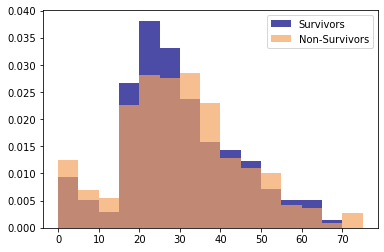

In [25]:
# Ref: nb03 for histograms
# Ref for plotting two histograms / make transparent a bit: https://www.kite.com/python/answers/how-to-plot-two-histograms-on-one-plot-using-matplotlib-in-python
my_bins = range(0,80,5)

#define data points for survived vs non
survived = dfTitanic[dfTitanic['Survived'] == 1]['Age']
dead = dfTitanic[dfTitanic['Survived'] == 0]['Age']

# use matplotlib to plot the histogram with alpha of .7 to make slightly transparent
plt.hist(survived, my_bins, label='Survivors', density=True, color='navy', alpha=0.7)
plt.hist(dead, my_bins, label='Non-Survivors',density=True, color = 'sandybrown', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Answer**  
Using a frequency histogram would be misleading because the number of observations are not the same. By scaling it to a density histogram, we are able to draw meaningful comparisons from the data. Using a frequency histogram may lead us to false conclusions

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Answer**  
Looking at the data, we see that those who were in a higher class tended to have a higher probability of survival. We also found that females had a higher probability of survival. The histogram of survivors by age is very slightly skewed right, which, so we found that younger people tended to survive more often than older people. It is possible that class warfare, male chivalry, age bias, or a combination of these factors played a part in who survived the Titanic. However, we cannot draw any conclusions. There is a correlation between class and survival, and gender and survival, but this does not prove causation.

**P.S.** It is not a component of your graded assignment, but the 1997 James Cameron film _Titanic_ captured some of these very notions in some riveting cinema. Whether or not you found evidence for these cases in the data, you might find it interesting to watch the movie (or just the segments of the sinking) to see one interpretation of these ideas. You can perhaps see how we might be persuaded to reinterpret the evidence of data by a heart-wrenching performance from a handsome young Leonardo DiCaprio!

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}

